![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<left> <span style="font-size: 30px;"> Deep Learning Convolutional Neural Network </span> </left>


+ <span style="font-size: 26px;"> Session: **Deep Learning Convolutional Neural Network  **
+ Assignment: ***CIFAR10 data***
+ Submitted by: **Paul Jason JUMALON**
+ Submitted to: **Miquel Larsson**

</span>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# Project Summary

Model | Time | Accuracy | Description 
:----- | :----: | :----: | :----: 
[Model 0](#model0)  | 0:02:11.227591 | [52.380](#model0results) | Example provided from exercise 
[Model 1](#model1)    | 0:03:10.847799 | [62.270](#model1results) | Model 0, 30 epochs, +early stopping  
[Model 2](#model2)    | 0:09:50.001046 | [67.310](#model2results) | Model 0, 30 epochs, +Conv layer, + Dropout 
[Model 3](#model3)    | 0:06:14.794296 | [72.430](#model3results) | 20 epochs, LeakyReLU, Flatten, Activation = Linear
[Model 4](#model4)    | 0:07:16.733360 | [72.530](#model4results) | Model 3,3 conv, 20 epochs, + Dropout
[Model 5](#model5)    | 0:07:09.732055 | [16.690](#model5results) | 3 conv, LeakyReLU, Dense =128, Activation = Relu  
[Model 6](#model6)    | 0:07:01.772266 | [74.350](#model6results) | 3 conv, LeakyReLU, Dense =10, Activation = linear  
[Model 7](#model7)    | 0:07:18.145815| [74.500](#model7results) | Model 6, Dropout reduced from 0.5 to 0.2 
[Model 8](#model8)    | 0:28:26.706488 | [80.030](#model8results) | epochs 60, kernel init = he_uniform, +early stopping, Act = Relu  
[Model 9](#model9)    | 0:29:06.150252 | [77.080](#model9results) | Model 7, 80 epochs
[Model 10](#model10)    | 1:45:02.185423 | [80.220](#model10results) | 80 epochs, Model 8, kernel initializer = he_uniform 

# 1. Libraries

To start, let's load those libraries that we need

In [193]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

from keras.utils import to_categorical

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


***

***
# Model 0 <a class="anchor" id="model0"></a> 

## 2. Model network architecture

In [170]:
#Example Provided : 

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(32, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [171]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                262176    
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 263,402
Trainable params: 263,402
Non-trainable params: 0
_________________________________________________________________


## 3. Optimizer, error function


In [172]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [173]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [174]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [175]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [176]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [177]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [178]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [179]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


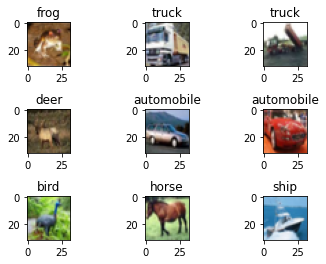

In [180]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

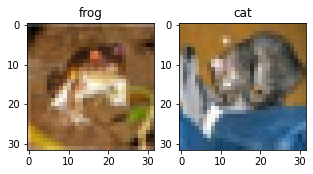

In [181]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [182]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [183]:
x_train[0].shape

(32, 32, 3)

In [184]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [185]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [186]:
t = time.perf_counter()

In [187]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/20
79/79 [==============================] - 7s 85ms/step - loss: 2.1286 - accuracy: 0.2408 - val_loss: 1.9491 - val_accuracy: 0.3158
Epoch 2/20
79/79 [==============================] - 6s 81ms/step - loss: 1.8209 - accuracy: 0.3560 - val_loss: 1.7510 - val_accuracy: 0.3748
Epoch 3/20
79/79 [==============================] - 6s 79ms/step - loss: 1.6952 - accuracy: 0.3934 - val_loss: 1.6539 - val_accuracy: 0.3977
Epoch 4/20
79/79 [==============================] - 6s 78ms/step - loss: 1.6105 - accuracy: 0.4245 - val_loss: 1.6284 - val_accuracy: 0.4140
Epoch 5/20
79/79 [==============================] - 6s 79ms/step - loss: 1.5573 - accuracy: 0.4421 - val_loss: 1.5514 - val_accuracy: 0.4420
Epoch 6/20
79/79 [==============================] - 6s 80ms/step - loss: 1.5157 - accuracy: 0.4549 - val_loss: 1.5231 - val_accuracy: 0.4533
Epoch 7/20
79/79 [==============================] - 6s 82ms/step - loss: 1.4822 - accuracy: 0.4642 - val_loss: 1.5367 - val_accuracy: 0.4413
Epoch 8/20
79

In [188]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:02:07.471539


## 6. We evaluate the results <a class="anchor" id="model0results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [189]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 52.380


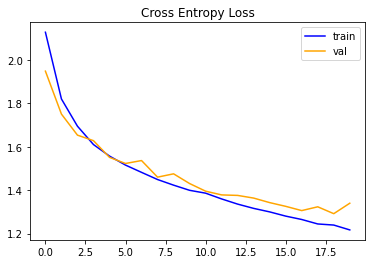

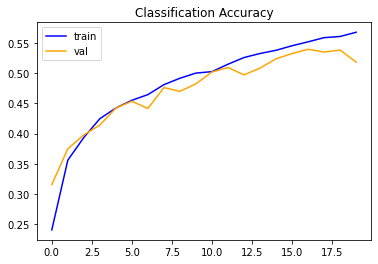

In [190]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [191]:
predictions = model.predict(x_test)

In [192]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


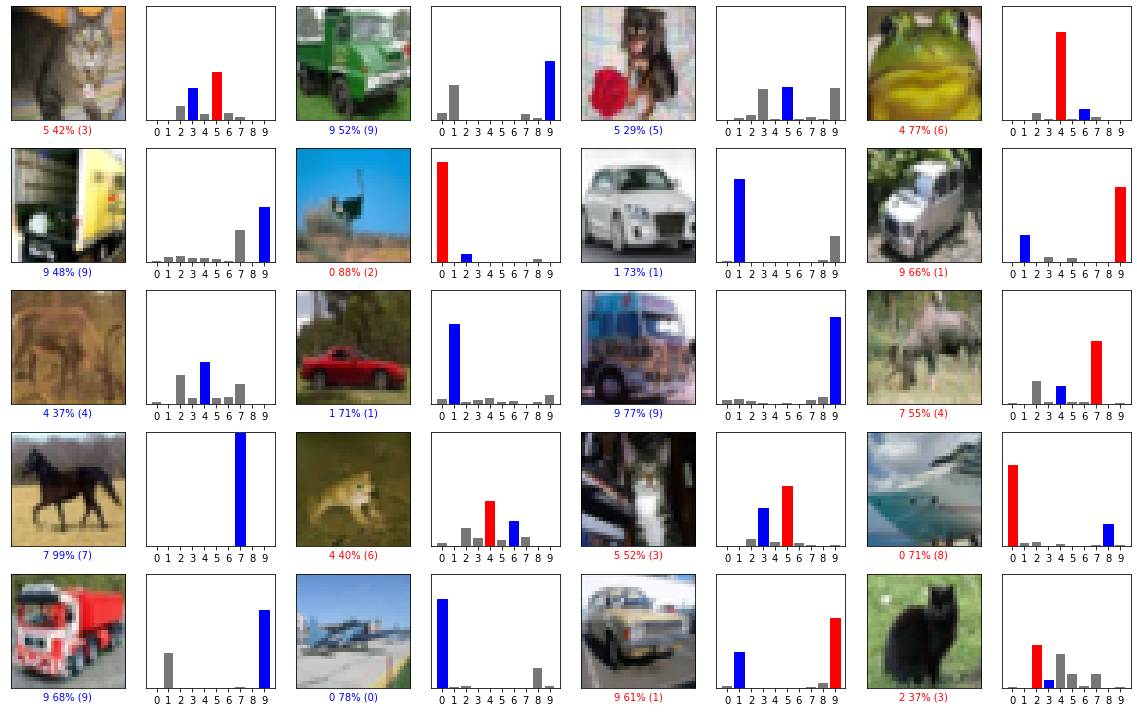

In [193]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [194]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 1 <a class="anchor" id="model1"></a> 

## 2. Model network architecture

In [141]:
# Model 1

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(32, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [142]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                262176    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 263,402
Trainable params: 263,402
Non-trainable params: 0
_________________________________________________________________


## 3. Optimizer, error function


In [143]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [144]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [145]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [146]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [147]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [148]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [149]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [150]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


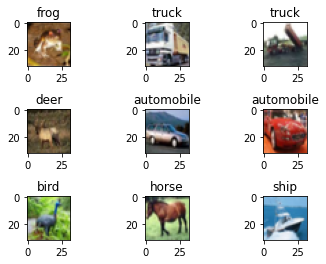

In [151]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

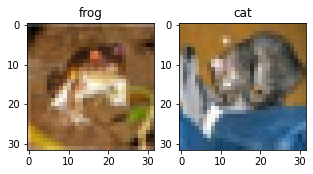

In [152]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [153]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [154]:
x_train[0].shape

(32, 32, 3)

In [155]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [156]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [159]:
t = time.perf_counter()

In [160]:
history = model.fit(x_train, y_train, epochs=30, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val),
                    callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/30
79/79 [==============================] - 7s 87ms/step - loss: 1.9601 - accuracy: 0.3049 - val_loss: 1.7484 - val_accuracy: 0.3865
Epoch 2/30
79/79 [==============================] - 6s 81ms/step - loss: 1.6272 - accuracy: 0.4379 - val_loss: 1.5609 - val_accuracy: 0.4621
Epoch 3/30
79/79 [==============================] - 6s 77ms/step - loss: 1.4858 - accuracy: 0.4790 - val_loss: 1.4726 - val_accuracy: 0.4879
Epoch 4/30
79/79 [==============================] - 6s 79ms/step - loss: 1.3914 - accuracy: 0.5131 - val_loss: 1.4006 - val_accuracy: 0.5067
Epoch 5/30
79/79 [==============================] - 6s 78ms/step - loss: 1.3237 - accuracy: 0.5343 - val_loss: 1.3479 - val_accuracy: 0.5394
Epoch 6/30
79/79 [==============================] - 6s 78ms/step - loss: 1.2774 - accuracy: 0.5497 - val_loss: 1.2989 - val_accuracy: 0.5581
Epoch 7/30
79/79 [==============================] - 6s 80ms/step - loss: 1.2395 - accuracy: 0.5615 - val_loss: 1.2665 - val_accuracy: 0.5705
Epoch 8/30
79

In [161]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:03:10.847799


## 6. We evaluate the results <a class="anchor" id="model1results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [162]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 62.270


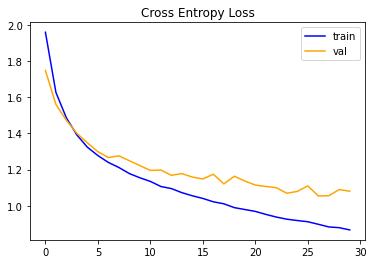

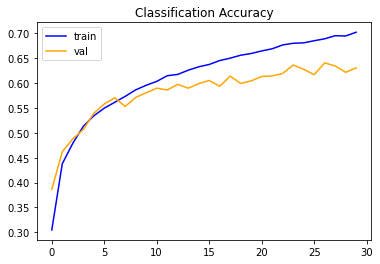

In [163]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [164]:
predictions = model.predict(x_test)

In [165]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


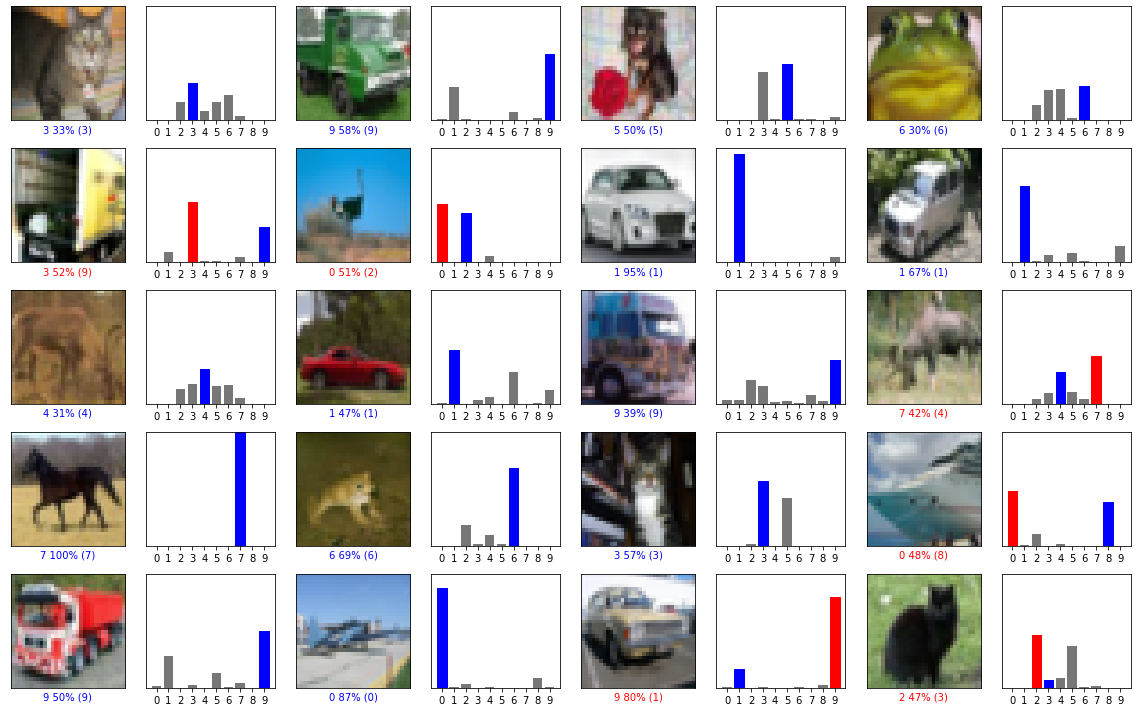

In [166]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [167]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 2 <a class="anchor" id="model2"></a> 

## 2. Model network architecture

In [2]:
#Model 2
model = ks.Sequential()

model.add(ks.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=1,
                           activation='relu',
                           input_shape=(32,32,3))) 
model.add(ks.layers.Conv2D(filters=28,
                           kernel_size=(3,3),
                           strides=1,
                           activation='relu'))
model.add(ks.layers.MaxPooling2D((2,2)))
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Dense(10, activation='softmax')) 


To review a model, we just have to call the **.Summary()** method of the model

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 28)        8092      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5488)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                351296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

## 3. Optimizer, error function


In [4]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [5]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [8]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [10]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [11]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


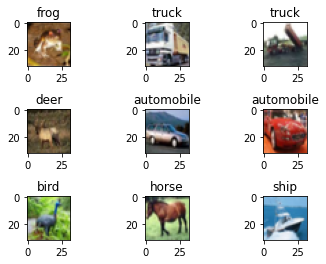

In [12]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

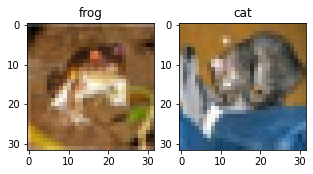

In [13]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [14]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [15]:
x_train[0].shape

(32, 32, 3)

In [16]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [17]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [20]:
t = time.perf_counter()

In [21]:
history = model.fit(x_train, y_train, epochs=30, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/30
79/79 [==============================] - 20s 254ms/step - loss: 1.9072 - accuracy: 0.3045 - val_loss: 1.5756 - val_accuracy: 0.4578
Epoch 2/30
79/79 [==============================] - 20s 249ms/step - loss: 1.5506 - accuracy: 0.4354 - val_loss: 1.3987 - val_accuracy: 0.5138
Epoch 3/30
79/79 [==============================] - 19s 246ms/step - loss: 1.4302 - accuracy: 0.4832 - val_loss: 1.3253 - val_accuracy: 0.5374
Epoch 4/30
79/79 [==============================] - 20s 247ms/step - loss: 1.3590 - accuracy: 0.5117 - val_loss: 1.2648 - val_accuracy: 0.5499
Epoch 5/30
79/79 [==============================] - 19s 239ms/step - loss: 1.3013 - accuracy: 0.5345 - val_loss: 1.1931 - val_accuracy: 0.5798
Epoch 6/30
79/79 [==============================] - 18s 232ms/step - loss: 1.2553 - accuracy: 0.5495 - val_loss: 1.1695 - val_accuracy: 0.5878
Epoch 7/30
79/79 [==============================] - 19s 236ms/step - loss: 1.2267 - accuracy: 0.5619 - val_loss: 1.1580 - val_accuracy: 0.5975

In [22]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:09:50.001046


## 6. We evaluate the results <a class="anchor" id="model2results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [23]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 67.310


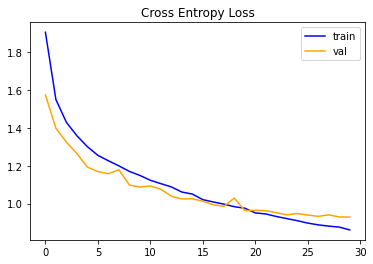

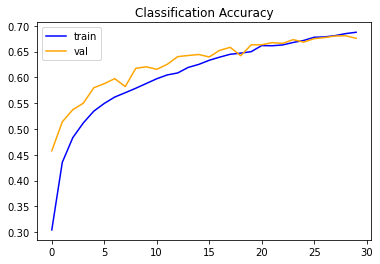

In [24]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(x_test)

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


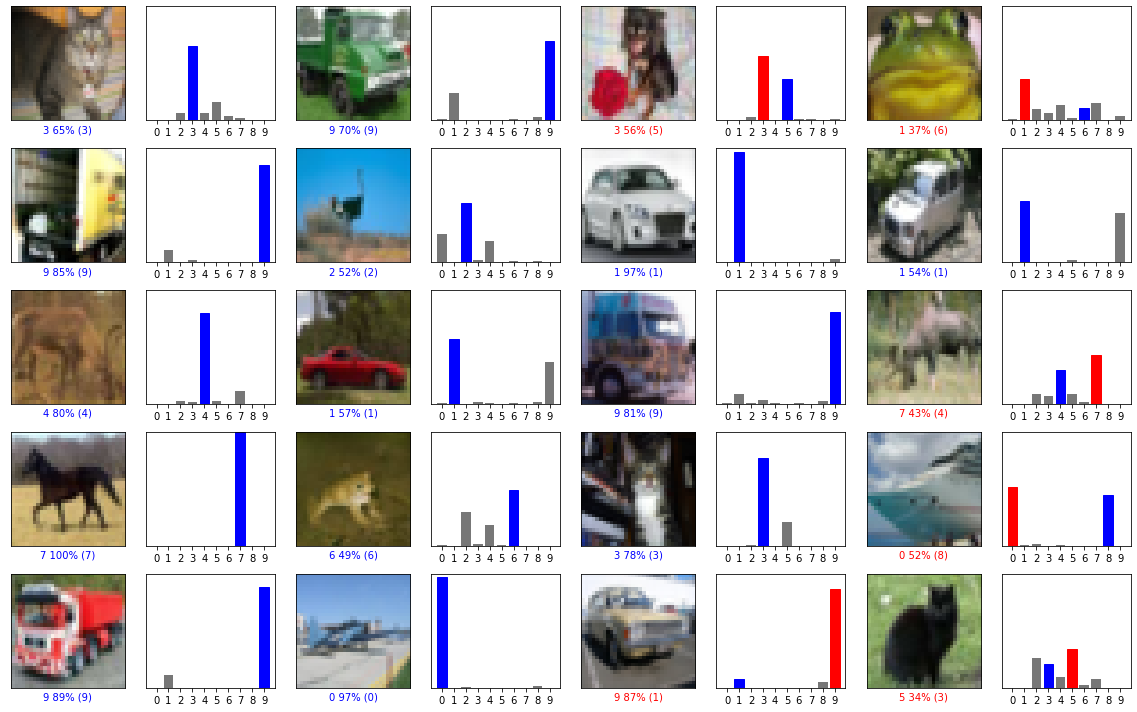

In [27]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [28]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 3 <a class="anchor" id="model3"></a> 

## 2. Model network architecture

In [29]:
#Model 3

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D((2, 2),padding='same'))
model.add(ks.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='linear'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

## 3. Optimizer, error function


In [31]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [32]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [33]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [34]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [35]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [36]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [37]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [38]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


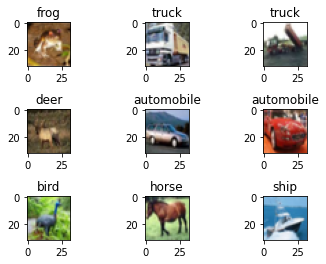

In [39]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

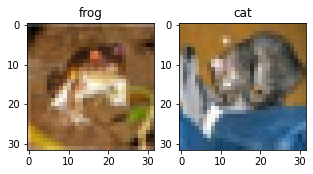

In [40]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [41]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [42]:
x_train[0].shape

(32, 32, 3)

In [43]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [44]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [47]:
t = time.perf_counter()

In [48]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/20
79/79 [==============================] - 19s 243ms/step - loss: 1.8060 - accuracy: 0.3514 - val_loss: 1.5458 - val_accuracy: 0.4401
Epoch 2/20
79/79 [==============================] - 18s 227ms/step - loss: 1.3984 - accuracy: 0.5001 - val_loss: 1.4962 - val_accuracy: 0.4636
Epoch 3/20
79/79 [==============================] - 18s 226ms/step - loss: 1.2561 - accuracy: 0.5529 - val_loss: 1.2752 - val_accuracy: 0.5641
Epoch 4/20
79/79 [==============================] - 18s 233ms/step - loss: 1.1307 - accuracy: 0.6038 - val_loss: 1.1429 - val_accuracy: 0.6028
Epoch 5/20
79/79 [==============================] - 19s 237ms/step - loss: 1.0304 - accuracy: 0.6413 - val_loss: 1.0280 - val_accuracy: 0.6416
Epoch 6/20
79/79 [==============================] - 20s 255ms/step - loss: 0.9647 - accuracy: 0.6659 - val_loss: 1.0038 - val_accuracy: 0.6498
Epoch 7/20
79/79 [==============================] - 19s 243ms/step - loss: 0.9093 - accuracy: 0.6822 - val_loss: 1.0022 - val_accuracy: 0.6554

In [49]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:06:14.794296


## 6. We evaluate the results <a class="anchor" id="model3results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [50]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 72.430


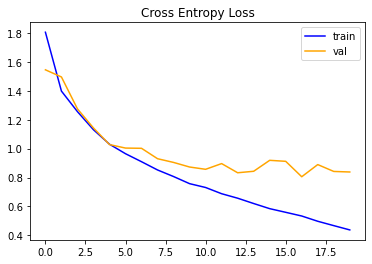

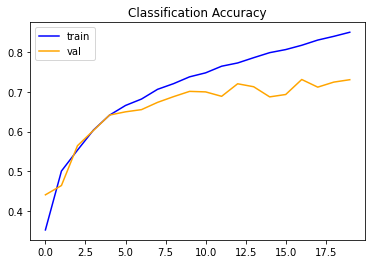

In [51]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [52]:
predictions = model.predict(x_test)

In [53]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


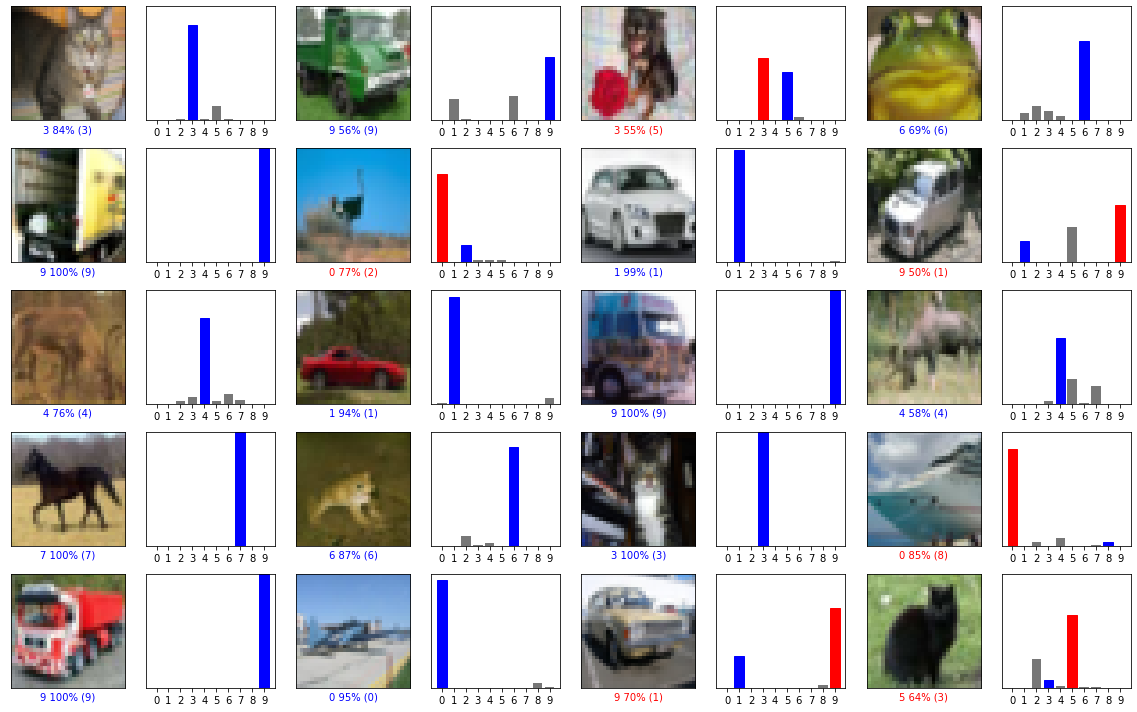

In [54]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [55]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 4 <a class="anchor" id="model4"></a> 

## 2. Model network architecture

In [56]:
#Model 4

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D((2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='linear'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

## 3. Optimizer, error function


In [58]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [59]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [60]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [61]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [62]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [63]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [64]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [65]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


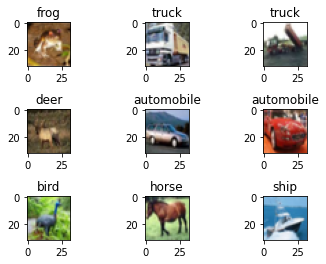

In [66]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

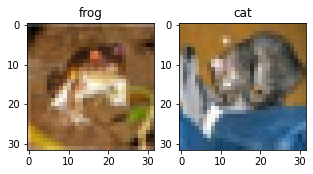

In [67]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [68]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [69]:
x_train[0].shape

(32, 32, 3)

In [70]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [71]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [72]:
t = time.perf_counter()

In [73]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/20
79/79 [==============================] - 21s 269ms/step - loss: 1.9060 - accuracy: 0.3069 - val_loss: 1.6657 - val_accuracy: 0.4025
Epoch 2/20
79/79 [==============================] - 21s 266ms/step - loss: 1.5418 - accuracy: 0.4435 - val_loss: 1.4303 - val_accuracy: 0.4937
Epoch 3/20
79/79 [==============================] - 20s 257ms/step - loss: 1.3794 - accuracy: 0.5055 - val_loss: 1.2851 - val_accuracy: 0.5494
Epoch 4/20
79/79 [==============================] - 21s 264ms/step - loss: 1.2608 - accuracy: 0.5508 - val_loss: 1.2140 - val_accuracy: 0.5690
Epoch 5/20
79/79 [==============================] - 21s 270ms/step - loss: 1.1889 - accuracy: 0.5803 - val_loss: 1.1264 - val_accuracy: 0.6070
Epoch 6/20
79/79 [==============================] - 21s 261ms/step - loss: 1.1197 - accuracy: 0.6049 - val_loss: 1.0571 - val_accuracy: 0.6331
Epoch 7/20
79/79 [==============================] - 21s 267ms/step - loss: 1.0594 - accuracy: 0.6271 - val_loss: 1.0156 - val_accuracy: 0.6406

In [74]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:07:16.733360


## 6. We evaluate the results <a class="anchor" id="model4results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [75]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 72.530


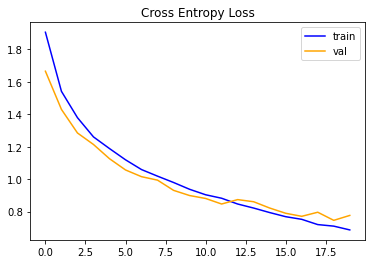

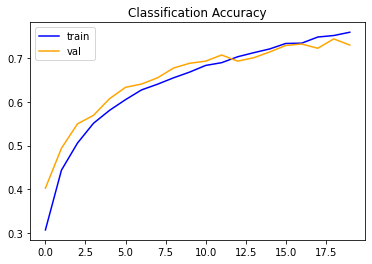

In [76]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [77]:
predictions = model.predict(x_test)

In [78]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


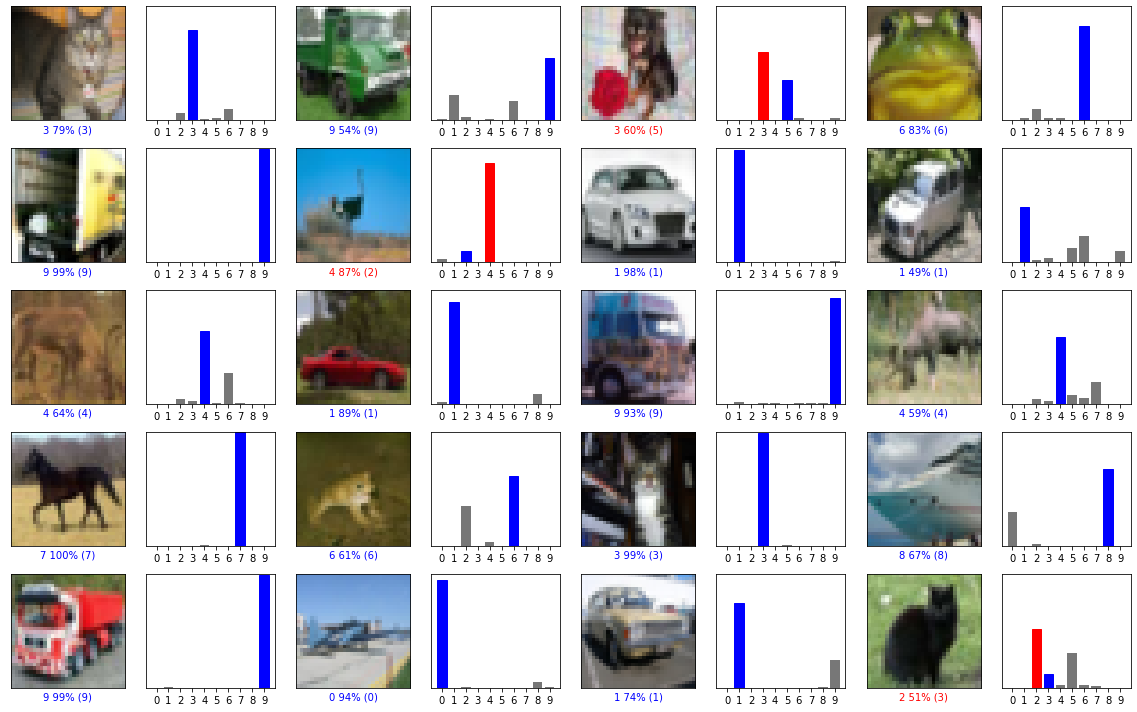

In [79]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [80]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 5 <a class="anchor" id="model5"></a> 

## 2. Model network architecture

In [104]:
#Model 5

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D((2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))

To review a model, we just have to call the **.Summary()** method of the model

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)         

## 3. Optimizer, error function


In [106]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [107]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [108]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [109]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [110]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [111]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [112]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [113]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


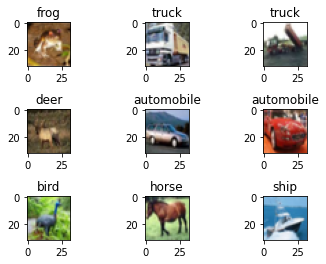

In [114]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

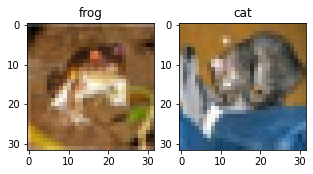

In [115]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [116]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [117]:
x_train[0].shape

(32, 32, 3)

In [118]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training

In [119]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [120]:
t = time.perf_counter()

In [121]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/20
79/79 [==============================] - 22s 278ms/step - loss: 2.4850 - accuracy: 0.0973 - val_loss: 2.2982 - val_accuracy: 0.1037
Epoch 2/20
79/79 [==============================] - 21s 264ms/step - loss: 2.3030 - accuracy: 0.1016 - val_loss: 2.3025 - val_accuracy: 0.1128
Epoch 3/20
79/79 [==============================] - 21s 270ms/step - loss: 2.3026 - accuracy: 0.1044 - val_loss: 2.3025 - val_accuracy: 0.1178
Epoch 4/20
79/79 [==============================] - 21s 270ms/step - loss: 2.3026 - accuracy: 0.1040 - val_loss: 2.3025 - val_accuracy: 0.1192
Epoch 5/20
79/79 [==============================] - 21s 269ms/step - loss: 2.3028 - accuracy: 0.1051 - val_loss: 2.2958 - val_accuracy: 0.1193
Epoch 6/20
79/79 [==============================] - 21s 271ms/step - loss: 2.3027 - accuracy: 0.1048 - val_loss: 2.3026 - val_accuracy: 0.1022
Epoch 7/20
79/79 [==============================] - 21s 269ms/step - loss: 2.3026 - accuracy: 0.1055 - val_loss: 2.3026 - val_accuracy: 0.1022

In [122]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:07:09.732055


## 6. We evaluate the results <a class="anchor" id="model5results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [123]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 16.690


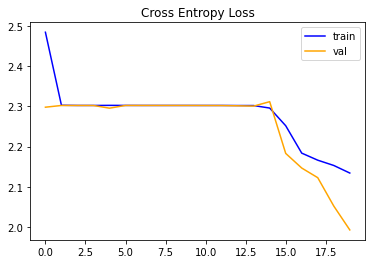

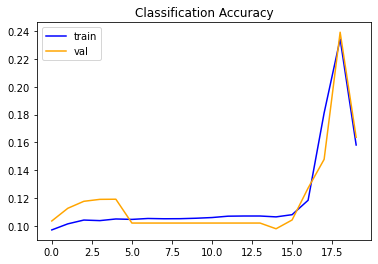

In [124]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [125]:
predictions = model.predict(x_test)

In [126]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

In [128]:
#ValueError: shape mismatch: objects cannot be broadcast to a single shape

#i = 0
#for l in cifar10_labels:
#    print(i, l)
#    i += 1

#num_rows = 5
#num_cols = 4
#start = 650
#num_images = num_rows*num_cols
#plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#for i in range(num_images):
#    plt.subplot(num_rows, 2*num_cols, 2*i+1)
#    plot_image(i+start, predictions[i+start], y_test, x_test)
#    plt.subplot(num_rows, 2*num_cols, 2*i+2)
#    plot_value_array(i+start, predictions[i+start], y_test)
#plt.tight_layout()
#plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [129]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 6 <a class="anchor" id="model6"></a> 

## 2. Model network architecture

In [130]:
#Model 6

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D((2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='linear'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)         

## 3. Optimizer, error function


In [132]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [133]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [134]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [135]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [136]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [137]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [138]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [139]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


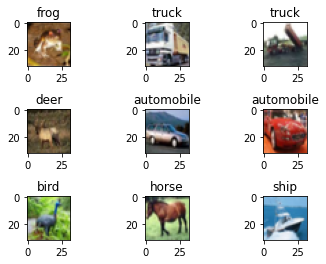

In [140]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

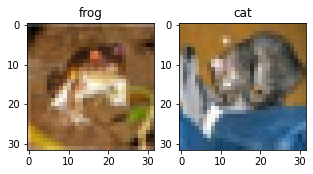

In [141]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [142]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [143]:
x_train[0].shape

(32, 32, 3)

In [144]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [145]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [146]:
t = time.perf_counter()

In [147]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/20
79/79 [==============================] - 22s 279ms/step - loss: 1.9195 - accuracy: 0.3024 - val_loss: 1.6631 - val_accuracy: 0.4080
Epoch 2/20
79/79 [==============================] - 21s 260ms/step - loss: 1.5596 - accuracy: 0.4361 - val_loss: 1.4947 - val_accuracy: 0.4641
Epoch 3/20
79/79 [==============================] - 21s 267ms/step - loss: 1.3974 - accuracy: 0.4974 - val_loss: 1.3435 - val_accuracy: 0.5329
Epoch 4/20
79/79 [==============================] - 21s 270ms/step - loss: 1.3040 - accuracy: 0.5332 - val_loss: 1.2663 - val_accuracy: 0.5488
Epoch 5/20
79/79 [==============================] - 21s 270ms/step - loss: 1.2261 - accuracy: 0.5640 - val_loss: 1.2138 - val_accuracy: 0.5665
Epoch 6/20
79/79 [==============================] - 21s 266ms/step - loss: 1.1559 - accuracy: 0.5911 - val_loss: 1.0539 - val_accuracy: 0.6353
Epoch 7/20
79/79 [==============================] - 21s 266ms/step - loss: 1.1023 - accuracy: 0.6100 - val_loss: 1.0239 - val_accuracy: 0.6415

In [148]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:07:01.772266


## 6. We evaluate the results <a class="anchor" id="model6results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [149]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 74.350


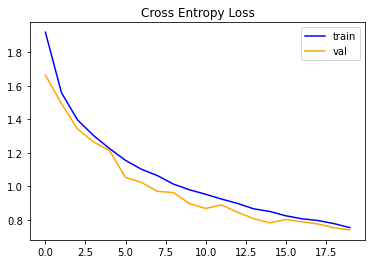

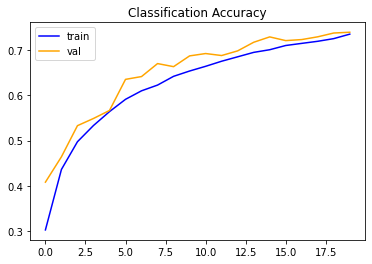

In [150]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [151]:
predictions = model.predict(x_test)

In [152]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


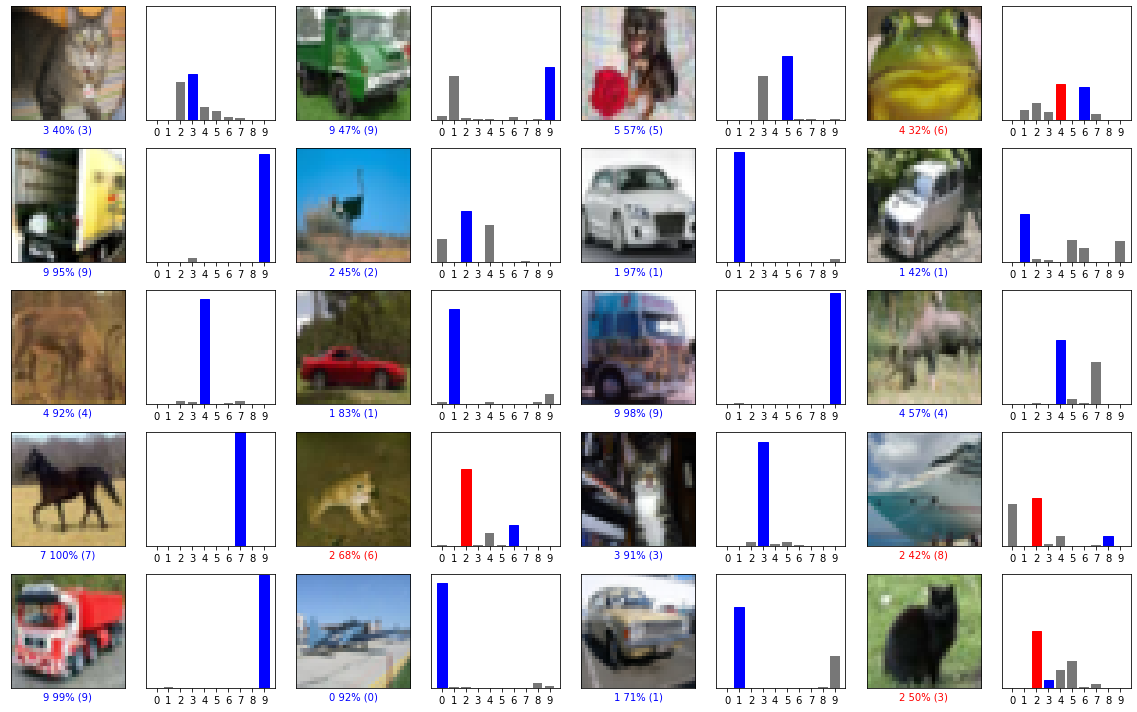

In [153]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [154]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 7 <a class="anchor" id="model7"></a> 

## 2. Model network architecture

In [155]:
#Model 7

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D((2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='linear'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.Dense(10, activation='softmax'))


To review a model, we just have to call the **.Summary()** method of the model

In [156]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)         

## 3. Optimizer, error function


In [157]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [158]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [159]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [160]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [161]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [162]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [163]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [164]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


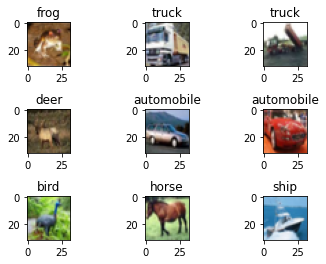

In [165]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

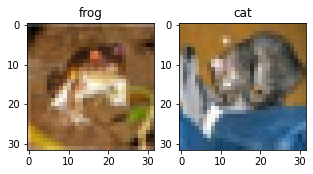

In [166]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [167]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [168]:
x_train[0].shape

(32, 32, 3)

In [169]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [170]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [171]:
t = time.perf_counter()

In [172]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/20
79/79 [==============================] - 22s 280ms/step - loss: 1.8804 - accuracy: 0.3141 - val_loss: 1.6241 - val_accuracy: 0.4099
Epoch 2/20
79/79 [==============================] - 21s 267ms/step - loss: 1.4917 - accuracy: 0.4578 - val_loss: 1.3468 - val_accuracy: 0.5239
Epoch 3/20
79/79 [==============================] - 21s 268ms/step - loss: 1.3278 - accuracy: 0.5252 - val_loss: 1.2246 - val_accuracy: 0.5704
Epoch 4/20
79/79 [==============================] - 21s 261ms/step - loss: 1.2373 - accuracy: 0.5580 - val_loss: 1.1807 - val_accuracy: 0.5811
Epoch 5/20
79/79 [==============================] - 21s 260ms/step - loss: 1.1413 - accuracy: 0.5965 - val_loss: 1.1248 - val_accuracy: 0.6056
Epoch 6/20
79/79 [==============================] - 21s 264ms/step - loss: 1.0859 - accuracy: 0.6171 - val_loss: 1.0499 - val_accuracy: 0.6289
Epoch 7/20
79/79 [==============================] - 21s 269ms/step - loss: 1.0268 - accuracy: 0.6383 - val_loss: 0.9821 - val_accuracy: 0.6565

In [173]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:07:18.145815


## 6. We evaluate the results <a class="anchor" id="model7results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [174]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 74.500


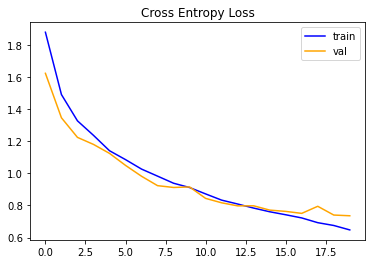

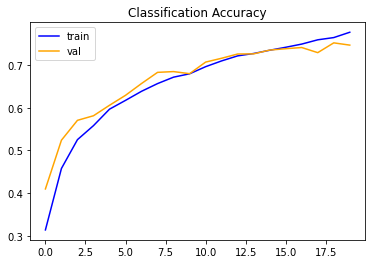

In [175]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [176]:
predictions = model.predict(x_test)

In [177]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


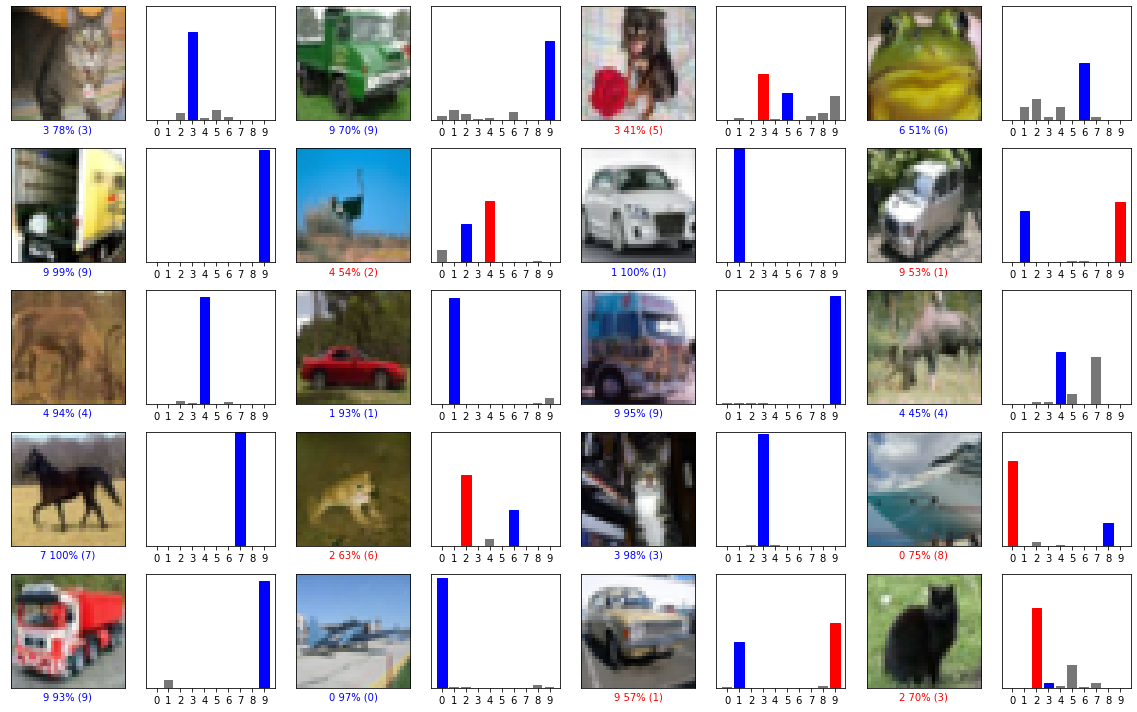

In [178]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [179]:
#Not saving Model as this does not reach target accuracy

#model.save('cifar10_base_model.h5')

***
# Model 8 <a class="anchor" id="model8"></a> 

## 2. Model network architecture

In [180]:
#Model 8
model = ks.Sequential()
	
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [181]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)         

## 3. Optimizer, error function


In [182]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [ ]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [ ]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


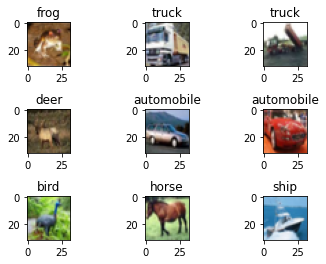

In [ ]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

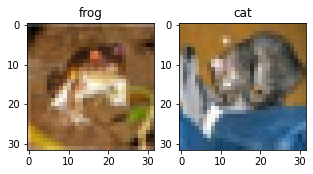

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [ ]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [183]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [184]:
t = time.perf_counter()

In [185]:
history = model.fit(x_train, y_train, epochs=60, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val),
                    callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/60
79/79 [==============================] - 57s 716ms/step - loss: 1.9523 - accuracy: 0.2671 - val_loss: 1.7213 - val_accuracy: 0.3667
Epoch 2/60
79/79 [==============================] - 59s 743ms/step - loss: 1.5811 - accuracy: 0.4191 - val_loss: 1.4216 - val_accuracy: 0.4875
Epoch 3/60
79/79 [==============================] - 60s 765ms/step - loss: 1.3901 - accuracy: 0.4989 - val_loss: 1.4146 - val_accuracy: 0.4914
Epoch 4/60
79/79 [==============================] - 61s 767ms/step - loss: 1.2501 - accuracy: 0.5527 - val_loss: 1.2867 - val_accuracy: 0.5515
Epoch 5/60
79/79 [==============================] - 60s 753ms/step - loss: 1.1517 - accuracy: 0.5915 - val_loss: 1.1811 - val_accuracy: 0.5951
Epoch 6/60
79/79 [==============================] - 59s 749ms/step - loss: 1.0643 - accuracy: 0.6234 - val_loss: 0.9785 - val_accuracy: 0.6540
Epoch 7/60
79/79 [==============================] - 58s 733ms/step - loss: 0.9832 - accuracy: 0.6517 - val_loss: 0.9234 - val_accuracy: 0.6756

In [186]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:28:26.706488


## 6. We evaluate the results <a class="anchor" id="model8results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [187]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 80.030


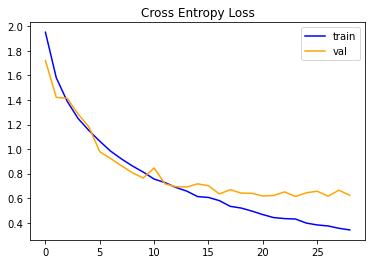

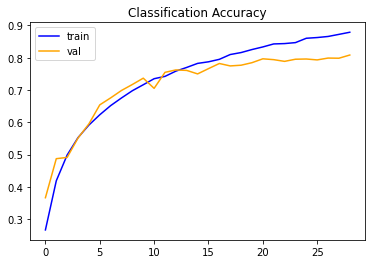

In [188]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [189]:
predictions = model.predict(x_test)

In [190]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


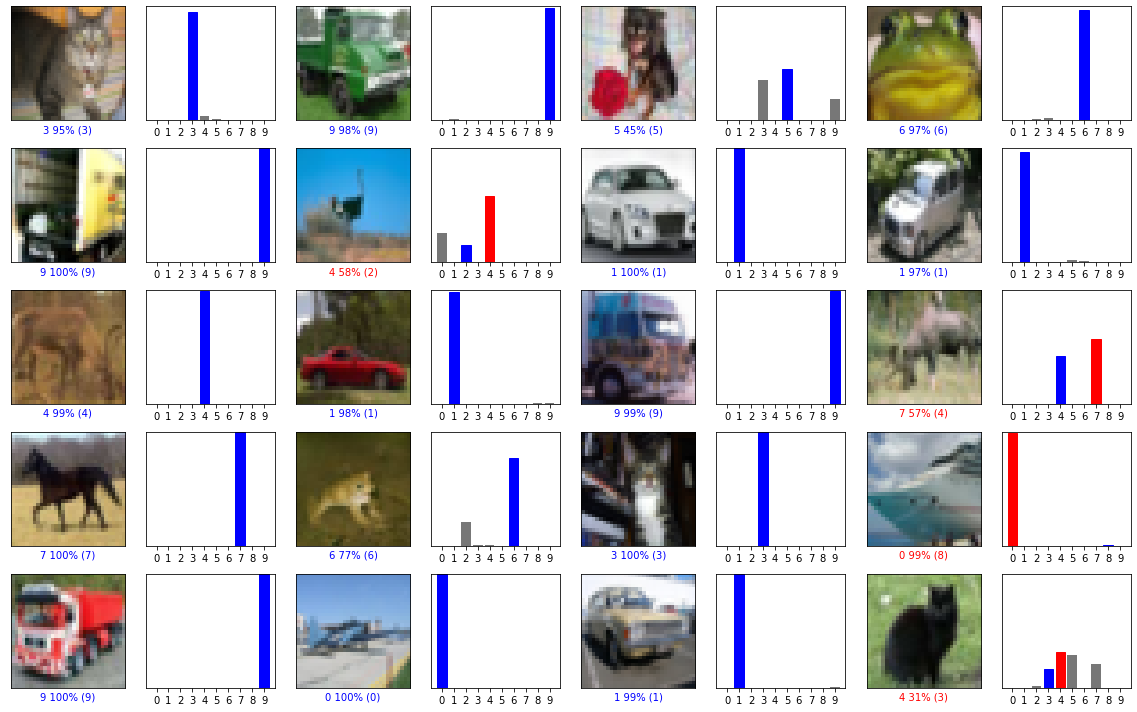

In [191]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [192]:
#saving Model as this has reached target accuracy

model.save('cifar10_base_model.h5')

***
# Model 9 <a class="anchor" id="model10"></a> 

## 2. Model network architecture

In [194]:
#Model 9 same as Model 7 but with 60 epochs
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D((2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(ks.layers.Dropout(0.25))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='linear'))
model.add(ks.layers.LeakyReLU(alpha=0.1))                  
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [195]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)         

## 3. Optimizer, error function


In [196]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [197]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [198]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [199]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [200]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [201]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [202]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [203]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


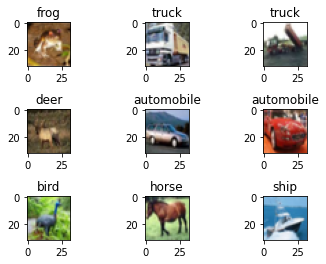

In [204]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

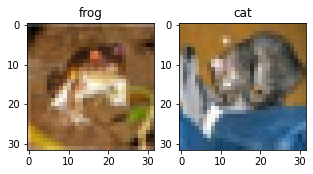

In [205]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [206]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [207]:
x_train[0].shape

(32, 32, 3)

In [208]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training


In [209]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [210]:
t = time.perf_counter()

In [211]:
history = model.fit(x_train, y_train, epochs=80, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/80
79/79 [==============================] - 23s 287ms/step - loss: 1.9243 - accuracy: 0.2953 - val_loss: 1.6571 - val_accuracy: 0.3958
Epoch 2/80
79/79 [==============================] - 21s 271ms/step - loss: 1.5349 - accuracy: 0.4444 - val_loss: 1.4353 - val_accuracy: 0.4892
Epoch 3/80
79/79 [==============================] - 22s 273ms/step - loss: 1.3751 - accuracy: 0.5093 - val_loss: 1.2938 - val_accuracy: 0.5392
Epoch 4/80
79/79 [==============================] - 21s 265ms/step - loss: 1.2631 - accuracy: 0.5525 - val_loss: 1.1864 - val_accuracy: 0.5945
Epoch 5/80
79/79 [==============================] - 21s 261ms/step - loss: 1.1667 - accuracy: 0.5872 - val_loss: 1.1333 - val_accuracy: 0.5994
Epoch 6/80
79/79 [==============================] - 21s 260ms/step - loss: 1.1016 - accuracy: 0.6114 - val_loss: 1.0922 - val_accuracy: 0.6133
Epoch 7/80
79/79 [==============================] - 21s 268ms/step - loss: 1.0480 - accuracy: 0.6274 - val_loss: 0.9919 - val_accuracy: 0.6544

In [213]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:29:06.150252


## 6. We evaluate the results <a class="anchor" id="model9results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [212]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 77.080


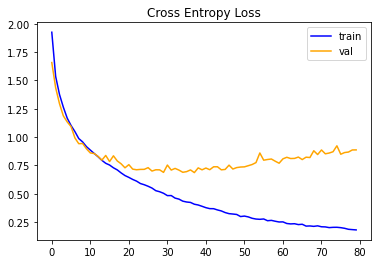

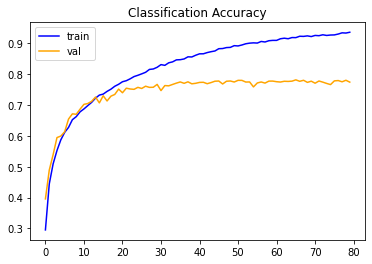

In [214]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [215]:
predictions = model.predict(x_test)

In [217]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


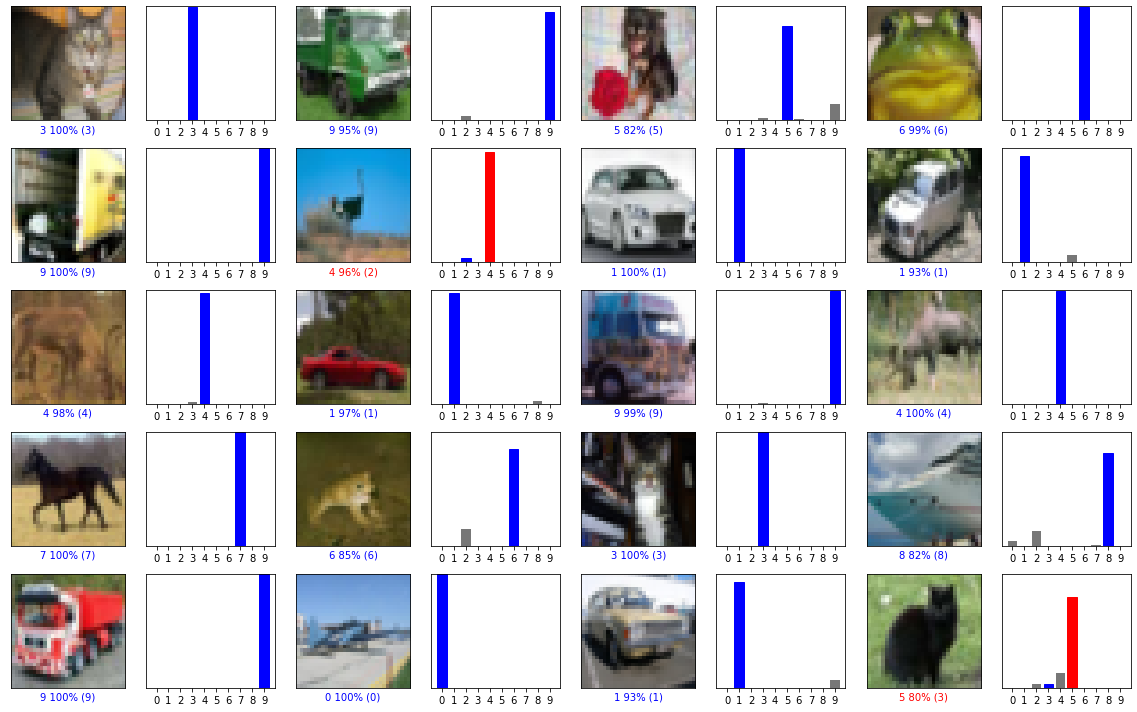

In [216]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [ ]:
#model.save('cifar10_base_model.h5')

***
# Model 10 <a class="anchor" id="model10"></a> 

## 2. Model network architecture

In [23]:
#Model 10
model = ks.Sequential()
	
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.Dropout(0.2))
model.add(ks.layers.Dense(10, activation='softmax'))

To review a model, we just have to call the **.Summary()** method of the model

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

## 3. Optimizer, error function


In [25]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

              

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32 x 32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [26]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [29]:
y_train_label = y_train
y_test_label = y_test
#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [31]:
y_test.min()

0

We obtain an array with all the labels of CIFAR10

In [32]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


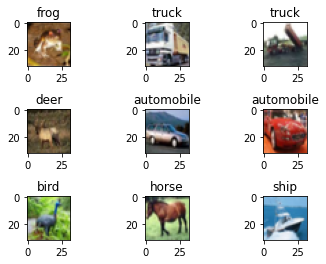

In [33]:
# Lets paint a sample of the images of CIFAR

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Text(0.5, 1.0, 'cat')

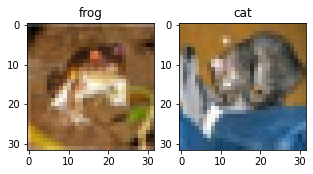

In [34]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_train_label[0,0]])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title(cifar10_labels[y_test_label[0,0]])

We are we going to want to validate while we train (very practical)

In [35]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [36]:
x_train[0].shape

(32, 32, 3)

In [37]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training
We will start with 80 epocs, that is, 80 complete passes of the dataset (which in turn will be with mini-batches internally), setting a batch of 512
The .fit() method also allows us to define if we have several CPUs, GPUs, and if we want to validate data at each end of epoch.

In [38]:
#callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
#callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

In [39]:
t = time.perf_counter()

In [42]:
history = model.fit(x_train, y_train, epochs=80, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val, y_val))#,
                    #callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/80
79/79 [==============================] - 59s 743ms/step - loss: 2.2254 - accuracy: 0.1820 - val_loss: 2.0486 - val_accuracy: 0.2478
Epoch 2/80
79/79 [==============================] - 55s 702ms/step - loss: 1.7665 - accuracy: 0.3567 - val_loss: 1.5900 - val_accuracy: 0.4339
Epoch 3/80
79/79 [==============================] - 56s 703ms/step - loss: 1.5297 - accuracy: 0.4410 - val_loss: 1.4059 - val_accuracy: 0.4948
Epoch 4/80
79/79 [==============================] - 56s 705ms/step - loss: 1.3896 - accuracy: 0.4967 - val_loss: 1.2656 - val_accuracy: 0.5459
Epoch 5/80
79/79 [==============================] - 55s 695ms/step - loss: 1.2626 - accuracy: 0.5472 - val_loss: 1.1394 - val_accuracy: 0.5923
Epoch 6/80
79/79 [==============================] - 55s 702ms/step - loss: 1.1642 - accuracy: 0.5868 - val_loss: 1.0430 - val_accuracy: 0.6342
Epoch 7/80
79/79 [==============================] - 56s 707ms/step - loss: 1.0869 - accuracy: 0.6184 - val_loss: 0.9901 - val_accuracy: 0.6498

In [45]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 1:45:02.185423


## 6. We evaluate the results <a class="anchor" id="model10results"></a> 

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [46]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 80.220


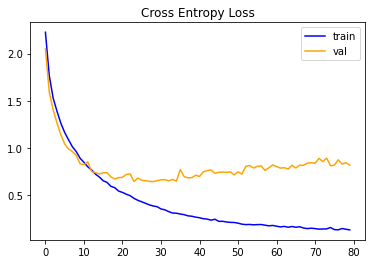

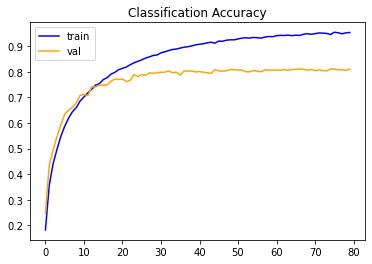

In [53]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [48]:
predictions = model.predict(x_test)

In [51]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


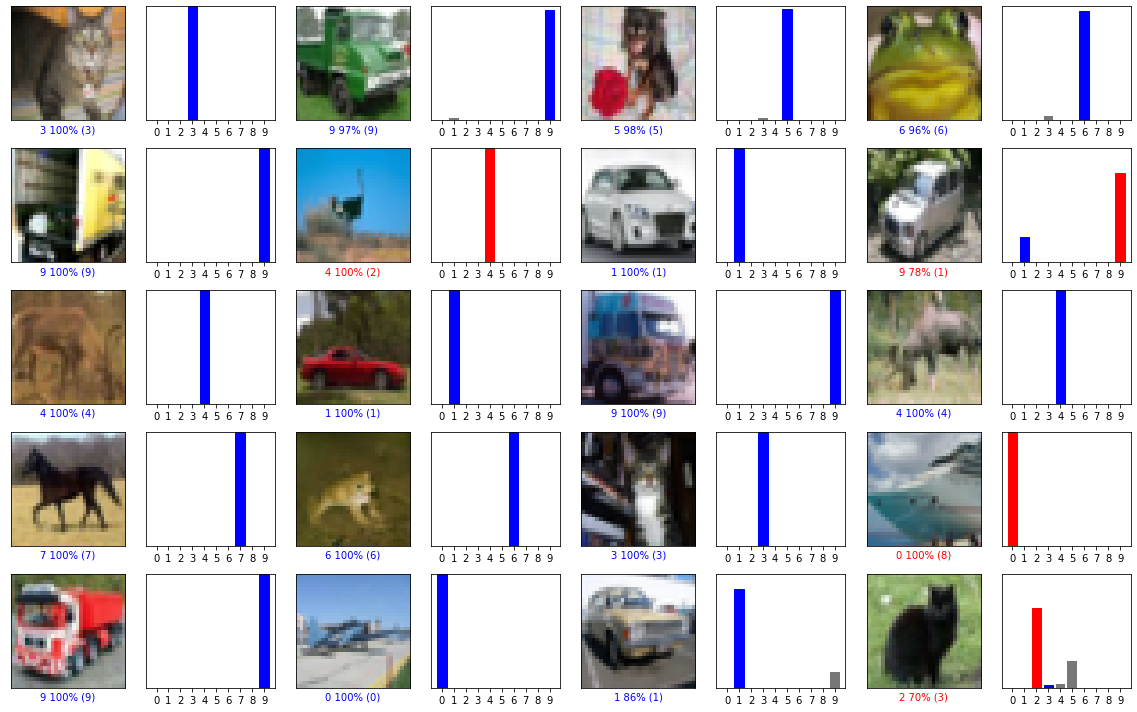

In [55]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [54]:
#Saving model as Accuracy has met the target of 80 percent

model.save('cifar10_base_model.h5')